# SOK-1006 V23

## Forelesning 10 - Mer om kostnadsminimering

### 1. Oppskrift for kostnadsminimering

Vi ser på en bedrift som bruker arbeidskraft og kapital til å produsere et gode gjennom bruk av følgende teknologi: $x=f(N,K)$. Da kan vi skrive kostnadsminimeringsproblemet som:        
$$ min_{N,K}\;wN+rK \;\; ubb\;\; x_0=f(N,K).$$

Vi har oppdaget at to ting må være oppfylt for å finne verdier på $N,K$ som gir et kostnadsminimum:

$$\begin{align}
\frac{w}{r}&=\frac{f'_N}{f'_K} \tag{1}\\
x_0 &=f(N,K) \tag {2}\\
\end{align}$$

La oss bruke disse betingelsene i et eksempel hvor $f(N,K)=N^{0.5}K^{0.5}, w=350, r=500, x_0=10.$



In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [2]:
N,K=sp.symbols('N K', real=True, positive=True)

In [3]:
# produktfunksjon
def x(N,K):
    return (N**.5)*(K**.5)
x(N,K)

K**0.5*N**0.5

In [4]:
# likning 1, mtsb
df_K=sp.diff(x(N,K),K)
df_N=sp.diff(x(N,K),N)
mtsb=df_N/df_K
display(mtsb)


1.0*K**1.0/N**1.0

Da kan likning (1) skrives $\frac{350}{500}=\frac{K}{N}$, eller $K=\frac{350}{500}N$. Dette kan vi sette inn i likning (2) for å sikre at den optimale kombinasjonen tilfredsstiller produksjonsbetingelsen.

In [5]:
prod=x(N,K).subs(K, 350*N/500)
display(prod)

0.836660026534076*N**1.0

In [6]:
# finn optimal verdi på N
opt_N = sp.solve(prod-10, N)
display(opt_N)

[11.9522860933439]

Dette er optimal mengde arbeidskraft! Optimal mengde kapital blir da $K=\frac{350}{500}(11.95)=8.365$. Da har vi funnet mengder arbeidskraft og kapital som minimerer produksjonskostnaden på 10 enheter. Tenk at vi vil løse problemet for et vilkårlig produksjonsnivå $X$. Da løser vi følgende:

In [7]:
X=sp.symbols('X', positive=True, real=True)
løsn_X=sp.solve([x(N,K)-X, K-(350/500)*N], K,N)
løsn_X

[(0.836660026534076*X, 1.19522860933439*X)]

Dette er den optimale tilpasningen for å produsere X enheter: $K=0.8367X, N=1.1952X$. Dermed kan vi beregne kostnaden for å produsere X enheter. La oss kalle dette $C$.

In [8]:
def C_X(X):
    return 500*0.8367*X+350*1.1952*X
C_X(X)

836.67*X

Dette viser den minimale kostnaden av å produsere X enheter. La oss vise løsningen som vi har funnet grafisk. Først tegner vi produksjonsisokvanten for $X=10$.

In [9]:
# Definer isokvanter
iso_X=sp.solve(x(N,K)-X,K)[0]
iso_X

X**2/N

Da er $K=\frac{X^2}{N}$ isokvanten for X enheter ferdigprodukt. Vi må gjøre dette om til et uttrykk som numpy kjenner igjen for å tegne det (`sp.lambdify`):

In [10]:
iso_fn=sp.lambdify(
    (X,N), 
    iso_X
)
iso_fn(X,N)

X**2/N

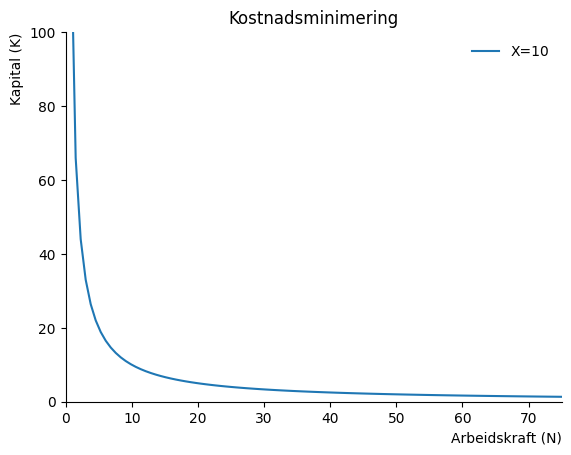

In [11]:
# tegne isokvanten for X=10

n=np.linspace(0.001,75, 100)

fig1, ax = plt.subplots()
ax.set_ylabel('Kapital (K)', loc='top')
ax.set_xlabel('Arbeidskraft (N)', loc='right')
ax.set(xlim=(0,75))
ax.set(ylim=(0,100))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
                

# plott funksjonen

ax.plot(n,iso_fn(10,n), label='X=10')

# tittel
ax.set_title('Kostnadsminimering')

#vis navnene:
ax.legend(loc='best',frameon=False);

Tegne inn isokostnadskurver. For et pengebeløp C vil isokostnadsfunksjon være: $C=wN+rK$. For å tegne dette i figuren må vi få K på venstresiden: $K=\frac{C}{r}-\frac{wN}{r}$. Dette er en rett linje med helning $\frac{-w}{r}$. Her er $\frac{w}{r}$ den relative prisen på arbeidskraft.

In [12]:
# Sett inn i uttrykket for isokost
def isokost(X,N):
    return C_X(X)/500 -(350/500)*N
isokost(X,N)

-0.7*N + 1.67334*X

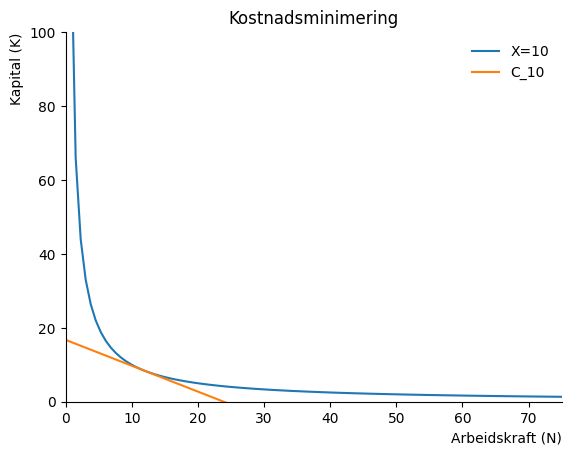

In [13]:
ax.plot(n, isokost(10,n), label='C_10')
ax.legend(loc='best',frameon=False)
fig1

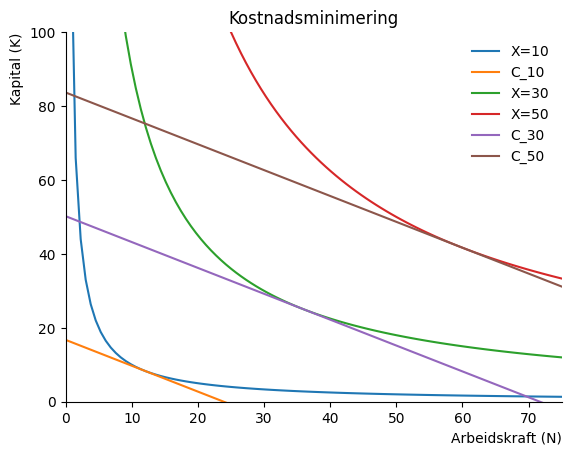

In [14]:
# sett inn isokvanter for X=30 og X=50, samt minkost for disse

ax.plot(n,iso_fn(30,n), label='X=30')
ax.plot(n,iso_fn(50,n), label='X=50')

ax.plot(n, isokost(30,n), label='C_30')
ax.plot(n, isokost(50,n), label='C_50')

ax.legend(loc='best',frameon=False)

fig1

Tidligere fant vi et fast forhold mellom kapital og arbeidskraft i en kostnadsminimerende løsning: $K=\frac{w}{r}N$. Dette kalles *substitumalen* og går gjennom alle kostnadsminimerende punkter.

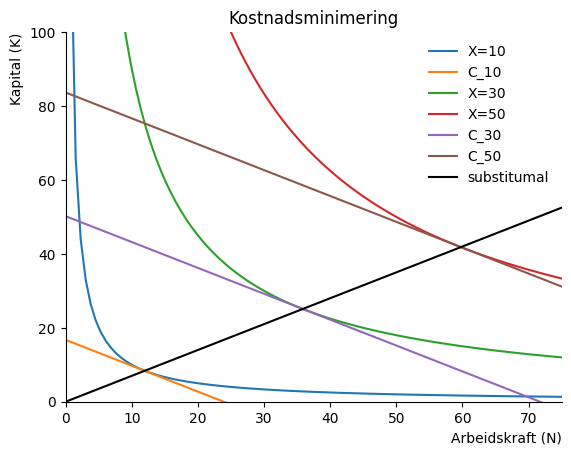

In [15]:
def substitumal(w,r,N):
    return N*w/r
ax.plot(n,substitumal(350,500,n),  color='black', label='substitumal')
ax.legend(loc='best',frameon=False)
fig1

**Oppgave**      
*I tillegg til faktorkostnaden har denne bedriften en fast kostnad på 10 000 NOK. Finn et uttrykk for total produksjonskostnad for X enheter produkt. Bruk dette uttrykket til å lage en funksjon som angir gjennomsnittskostnad (AC) på lang sikt. Tegn AC funksjonen ved å sette din funksjonen inn i koden nedenfor:*

In [16]:
#total kostnad
def C_X_FK(X):
    return C_X(X) + 10000

#gjennomsnittskostnad
def gjennomsnittskostnad(X):
    return C_X_FK(X) / X

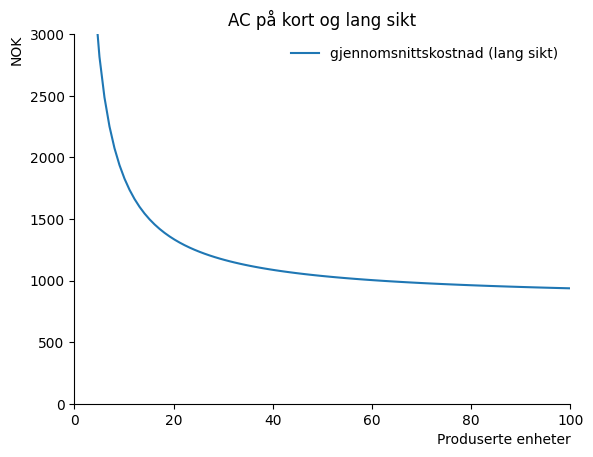

In [17]:
x_num=np.linspace(0.001,100, 100)

fig2, ax = plt.subplots()
ax.set_ylabel('NOK', loc='top')
ax.set_xlabel('Produserte enheter', loc='right')
ax.set(xlim=(0,100))
ax.set(ylim=(0,3000))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
                

# plott funksjonen her
ax.plot(x_num, gjennomsnittskostnad(x_num), label="gjennomsnittskostnad (lang sikt)")

# tittel
ax.set_title('AC på kort og lang sikt')

#vis navnene:
ax.legend(loc='best',frameon=False);

**Oppgave fortsetter**      
*I forelesning 9 har dere allerede funnet et utrykk for bedriftens totale produksjonskostnad på kort sikt som en funksjon av produsert mengde og kapitalbeholdningen: $C_s(X, K_0)=10000 + 500K_0 +\frac{350X^2}{K_0}$. Beregn den totale gjennomsnittskostnaden, og plott dette inn i figuren for $K=10, K=25, K=50$ sammen med AC på lang sikt. Bruk figuren til å forklare forholdet mellom gjennomsnittskostnaden på kort og lang sikt.*

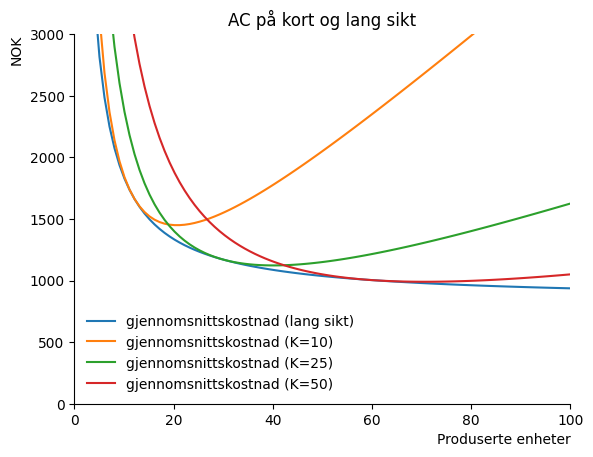

In [18]:
# skriv ditt svar her

def cks (X, K):
    return 10000 + (500*K) + ((350*X**2)/K)

def gjennomsnittskostnad_ks (X, K):
    return cks(X, K)/X


ax.plot(x_num, gjennomsnittskostnad_ks(x_num, 10), label="gjennomsnittskostnad (K=10)")

ax.plot(x_num, gjennomsnittskostnad_ks(x_num, 25), label="gjennomsnittskostnad (K=25)")

ax.plot(x_num, gjennomsnittskostnad_ks(x_num, 50), label="gjennomsnittskostnad (K=50)")

ax.legend(loc='best',frameon=False)
fig2


### 2. Estimering

Anta at vi som økonomer tror at bedriften har følgende produktfunksjon: 
$$x=ZN^aK^b. \tag{3}$$

Ved å bruke fremgangsmåten og koden ovenfor kan vi vise at likning (1) innebærer at $K=(\frac{w}{r})(\frac{b}{a})N$. (Legg merke til at det relative forholdet mellom faktorene i en kostnadsminimerende løsning er avhengig av både økonomiske og produksjonstekniske forhold her). Herfra kan vi finne bedriftens etterspørsel etter de to faktorene.

In [19]:
# angi nye symboler

Z,a,b,w,r =sp.symbols('Z a b w r', real=True, positive=True)

# produktfunksjon
x_0 = Z*N**a*K**b

# løs for produksjon av mengde X gitt forholdet ovenfor

K_sol=sp.solve(sp.Eq((x_0).subs(N,K*a*r/(b*w)),X),K)[0]
N_sol=sp.solve(sp.Eq((x_0).subs(K,N*b*w/(a*r)),X),N)[0]
display(K_sol)
display(N_sol)

(X*b**a*w**a/(Z*a**a*r**a))**(1/(a + b))

(X*a**b*r**b/(Z*b**b*w**b))**(1/(a + b))

In [20]:
# beregne totalkostnad

Kostnad= w*N_sol+r*K_sol
display(Kostnad)

r*(X*b**a*w**a/(Z*a**a*r**a))**(1/(a + b)) + w*(X*a**b*r**b/(Z*b**b*w**b))**(1/(a + b))

Så langt klarer vi å komme med en teoretisk modell. Som analytikere har vi tilgang til faktorpriser ($w,r$), og vi har muligens data på bedriftens produksjon og faktorforbruk. Vi kan bruke dette for å estimere verdier på det som vi ikke kjenner i produktfunksjon, nemlig $Z, a, b$. Uttrykket i (3) er ikke lineært, og det er enklere å estimere lineære sammenhenger. Da kan vi bruke logaritmer.

In [21]:
sp.log(x_0).expand(force=True)

a*log(N) + b*log(K) + log(Z)

Da kan vi skrive (3) om til

$$ ln(x)=ln(Z)+a\;ln(N)+b\;ln(K)\tag{4}$$

La oss lage litt data som vi kan estimere på.

In [22]:
from numpy import random as rd

import statsmodels as sm
import pandas as pd


samp_size=100


K_obs=np.exp(rd.normal(3,1,samp_size))


df=pd.DataFrame({'N':np.exp(rd.normal(3,1,samp_size)), 
                 'K':np.exp(rd.normal(2,1,samp_size)), 
                 'Z':np.exp(rd.normal(0,1,samp_size))
                })

df['x']=df['Z']*df['N']**(rd.rand())*df['K']**(rd.rand())

df


,N,K,Z,x
0,16.155724,0.491317,0.874493,2.059429
1,69.598222,26.117265,0.723125,67.285290
2,13.888067,1.841371,0.829061,4.829566
3,59.098224,2.666274,3.039694,47.907756
4,17.491731,39.063404,1.072510,67.692279
...,...,...,...,...
95,59.798781,8.500738,0.470450,17.640215
96,16.019103,2.471223,1.479965,11.515445
97,7.717159,9.619550,2.911073,43.203395
98,15.666336,1.808493,1.283621,7.833948


Her har vi laget 100 observasjoner på arbeidskraft og kapital (vi har også laget 100 observasjoner på Z som representerer "støy" i statistisk sammenheng). Så har vi generert et tall mellom 0 og 1 for a og et annet tall mellom 0 og 1 for b. Disse tallene har vi brukt for å lage produksjonsnivået x fra denne sammenhengen.         

**NB denne koden genererer forskjellige data hver gang! Dersom vi vil at vårt arbeid skal være reproduserbart (dvs kunne verifiseres av andre med samme kode) må vi bruke en initiering av `rd`. Dette gjøres med en "seed". Prøv å skrive rd.seed(10) i koden etter at du importerer pakkene i kodecellen ovenfor. Kjør cellen og noter deg dataene i første linje. Kjør cellen på nytt så bør du få samme data**      

Vi kjenner ikke verdien på a og b og må estimere verdier for disse parametre. Vi begynner med å ta logaritmer av våre dataserier.

In [23]:
df['lnN']=np.log(df['N'])
df['lnK']=np.log(df['K'])
df['lnZ']=np.log(df['Z'])
df['lnx']=np.log(df['x'])

df

,N,K,Z,x,lnN,lnK,lnZ,lnx
0,16.155724,0.491317,0.874493,2.059429,2.782274,-0.710665,-0.134110,0.722429
1,69.598222,26.117265,0.723125,67.285290,4.242739,3.262597,-0.324174,4.208942
2,13.888067,1.841371,0.829061,4.829566,2.631030,0.610511,-0.187461,1.574757
3,59.098224,2.666274,3.039694,47.907756,4.079201,0.980682,1.111757,3.869277
4,17.491731,39.063404,1.072510,67.692279,2.861728,3.665186,0.070002,4.214972
...,...,...,...,...,...,...,...,...
95,59.798781,8.500738,0.470450,17.640215,4.090985,2.140153,-0.754065,2.870181
96,16.019103,2.471223,1.479965,11.515445,2.773782,0.904713,0.392018,2.443689
97,7.717159,9.619550,2.911073,43.203395,2.043446,2.263798,1.068522,3.765919
98,15.666336,1.808493,1.283621,7.833948,2.751514,0.592494,0.249685,2.058467


Nå har vi det meste av det som inngår i likning (4). Vi skal bruke pakken `statsmodels` til å gjennomføre en enkel estimering (regresjon med OLS - Ordinary Least Squares).

In [24]:
import statsmodels.formula.api as smf

mod = smf.ols(formula='lnx ~ lnN + lnK', data=df)
res = mod.fit()
print(res.summary())
print(res.params)


                            OLS Regression Results                            
Dep. Variable:                    lnx   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     72.00
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           6.78e-20
Time:                        19:12:48   Log-Likelihood:                -127.20
No. Observations:                 100   AIC:                             260.4
Df Residuals:                      97   BIC:                             268.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2522      0.307     -0.822      0.4

Legg merke til at `res.params` gir oss ei liste med koeffisienter nederst. lnZ er "Intercept" `res.params[0]`, a er `res.params[1]`, b er `res.params[2]`. Legg merke til at `res.params[0]`=ln Z. For å finne Z må vi skrive om $e^{lnZ}=e^{res.params[0]}$, dvs $Z=e^{res.params[0]}$. Vi kan bruke dette til å sette inn fra regresjonen i kostnadsfunksjon.

In [25]:
Z_num=np.exp(res.params[0])
print("Estimert Z er",  Z_num)

Estimert Z er 0.7771239527671563


In [26]:
print("Estimert verdi på a er", res.params[1])
print("Estimert verdi på b er", res.params[2])

Estimert verdi på a er 0.6203992345044993
Estimert verdi på b er 0.7405762371461154


**Oppgave**       
*Hvilke skalaegenskaper har denne produktfunksjonen?*

Nå kan vi beregne kostnadsfunksjonen til bedriften. La oss anta som før $w=350, r=500$. Vi kan tegne totalkostnad, gjennomsnittskostnad og grensekostnad.

In [27]:
# definer funksjoner

C=sp.lambdify(
    (w, r,X,Z,a,b), 
    w*N_sol+r*K_sol
)

avgC=sp.lambdify(
    (w, r,X,Z,a,b), 
    (w*N_sol+r*K_sol)/X
)

dC=sp.lambdify(
    (w, r,X,Z,a,b), 
    sp.diff(w*N_sol+r*K_sol,X)
)

#sett inn verdier

print(C(350,500,X,Z_num,res.params[1],res.params[2]))
print(avgC(350,500,X,Z_num,res.params[1],res.params[2]))
print(dC(350,500,X,Z_num,res.params[1],res.params[2]))

1018.95938062091*X**0.734767099650358
1018.95938062091/X**0.265232900349642
748.697828760351/X**0.265232900349642


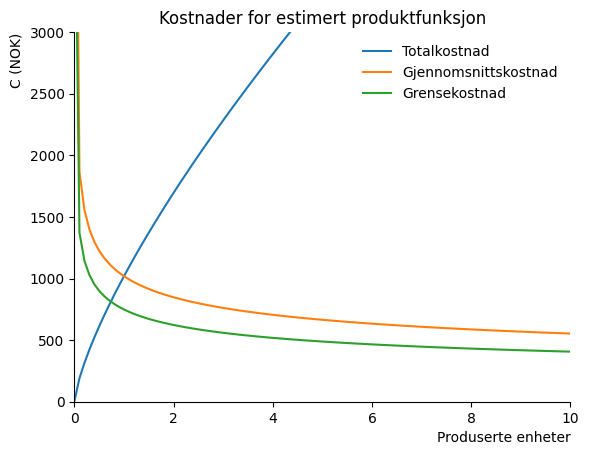

In [28]:
X=np.linspace(0.001,10, 100)

fig3, ax = plt.subplots()
ax.set_ylabel('C (NOK)', loc='top')
ax.set_xlabel('Produserte enheter', loc='right')
ax.set(xlim=(0,10))
ax.set(ylim=(0,3000))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
                

# plott funksjonen her

ax.plot(X,
        C(350,500,X,Z_num,res.params[1],res.params[2])
        ,label='Totalkostnad')
ax.plot(X,
        avgC(350,500,X,Z_num,res.params[1],res.params[2])
        ,label='Gjennomsnittskostnad')
ax.plot(X,
        dC(350,500,X,Z_num,res.params[1],res.params[2])
        ,label='Grensekostnad')


# tittel
ax.set_title('Kostnader for estimert produktfunksjon')

#vis navnene:
ax.legend(loc='best',frameon=False);



**Oppgave**        

*Vi skal analysere årlig data fra Tesla på kapitalutgifter (USD), arbeidere, og antall biler laget i perioden 2012-2020.*    



In [29]:
# last inn data

df1=pd.read_csv("https://uit-sok-1006-v23.github.io/data/tesladata.csv",delimiter=";")


df1


,YEAR,CAPEX,Arbeidere,Produksjon
0,2012,239200000,2964,2663
1,2013,264200000,5859,22477
2,2014,969900000,10161,31655
3,2015,1635000000,13058,50658
4,2016,1440000000,17782,76285
5,2017,4081000000,37543,103181
6,2018,2319000000,48817,245506
7,2019,1432000000,48016,365232
8,2020,3232000000,70757,509737


*a) Plott disse seriene i en figur med tid på den horisontale aksen.*   


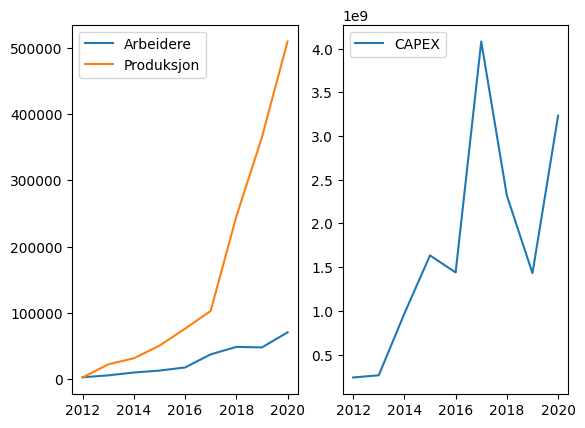

In [53]:
# skriv svaret ditt her

fig, (ax1,ax2) = plt.subplots(1, 2)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax2.plot(df1['YEAR'],df1['CAPEX'], label = 'CAPEX')
ax1.plot(df1['YEAR'],df1['Arbeidere'], label = 'Arbeidere')
ax1.plot(df1['YEAR'],df1['Produksjon'], label = 'Produksjon')
ax1.legend(loc = 'best')
ax2.legend(loc = 'best');

*Anta at produktfunksjonen for Tesla er som gitt i (3) ovenfor. Vi skal undersøke skalaegenskaper til Teslas produktfunksjon. I forelesning 8 (paperet om Kina) så vi at man kunne estimere følgende likning for å undersøke dette:*

\begin{equation}
  ln (\frac{x}{N}) = ln Z + (a+b-1)\;ln N + b\; ln (\frac{K}{N})\tag{5}
\end{equation}

*Kjør følgende kode for å estimere denne likningen:*

In [31]:
# Vi skal estimere ln(xperN) = konstant + (a+b-1)ln(N) +bln(KperN)

# Vi er interessert i om a+b-1 er statistisk annerledes enn 0.

# I tabellen se på t verdien på ln(N), er dette over 2 kan vi konkludere med at koeffisienten ikke er null.

# Generer variablene: husk at ln(x/N)=ln(x)-ln(N) osv
df1['lnN']=np.log(df1['Arbeidere'])
df1['lnKperN']=np.log(df1['CAPEX'])-df1['lnN']
df1['lnxperN']=np.log(df1['Produksjon'])-df1['lnN']

# Estimer ved hjelp av ols.

mod = smf.ols(formula='lnxperN ~ lnN + lnKperN', data=df1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                lnxperN   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     6.869
Date:                Fri, 31 Mar 2023   Prob (F-statistic):             0.0281
Time:                        19:12:49   Log-Likelihood:                -2.7643
No. Observations:                   9   AIC:                             11.53
Df Residuals:                       6   BIC:                             12.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7388      4.252      0.409      0.6

C:\Users\gusta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


*b) Hva viser din analyse om skalautbytte til Tesla?*    
*c) Er du fornøyd med resultatene fra analysen, eller er det noe som ikke ser helt riktig ut?*    
*d) Er ditt resultat forenelig med [denne analysen](https://cleantechnica.com/2018/07/22/peeking-behind-teslas-cost-of-materials-curtain/) av Tesla sine kostnader?*   
*e) Gitt denne analysen hvilke andre variabler bør inkluderes i (3), og hvordan vil den nye produktfunksjonen se ut (gitt at den er Cobb-Douglas)?* 

In [32]:
# Skriv ditt svar her